In [3]:
import numpy as np
import pandas as pd


df = pd.read_csv("/home/muhajirin/Downloads/ds_salaries.csv", usecols = ['job_title', 'salary_in_usd', 'experience_level', 'work_year'])

df.head()

,work_year,experience_level,job_title,salary_in_usd
0,2020,MI,Data Scientist,79833
1,2020,SE,Machine Learning Scientist,260000
2,2020,SE,Big Data Engineer,109024
3,2020,MI,Product Data Analyst,20000
4,2020,SE,Machine Learning Engineer,150000


In [62]:
df.query("experience_level == 'MI' and job_title == 'Data Scientist'").groupby('work_year').describe()

salary_in_usd                                                \
                  count          mean           std      min      25%   
work_year                                                               
2020               11.0  71256.000000  35724.454515  35735.0  41339.0   
2021               27.0  72144.925926  47342.267358   2859.0  35816.5   
2022               22.0  99573.590909  47752.591732  31615.0  66412.5   

                                        
               50%       75%       max  
work_year                               
2020       62726.0   92416.5  138350.0  
2021       73000.0  112000.0  160000.0  
2022       95807.0  130000.0  200000.0

In [9]:
highlighed_data = df.query("experience_level == 'MI' and job_title == 'Data Scientist'")

In [17]:
x_axis = highlighed_data.get('work_year').unique()

In [43]:
total_occupied_jobs = list(map(lambda year: highlighed_data.query('work_year == ' + str(year)).count().work_year ,x_axis))

In [54]:
std_salary_jobs = list(map(lambda year: highlighed_data.query('work_year == ' + str(year)).filter(['salary_in_usd']).std().salary_in_usd ,x_axis))

In [80]:
from sklearn import preprocessing

normalized_total_occupied_jobs = preprocessing.normalize([total_occupied_jobs])
normalized_std_salary_jobs = preprocessing.normalize([std_salary_jobs])

In [83]:
normalized_total_occupied_jobs[0]

array([0.30117212, 0.73924067, 0.60234425])

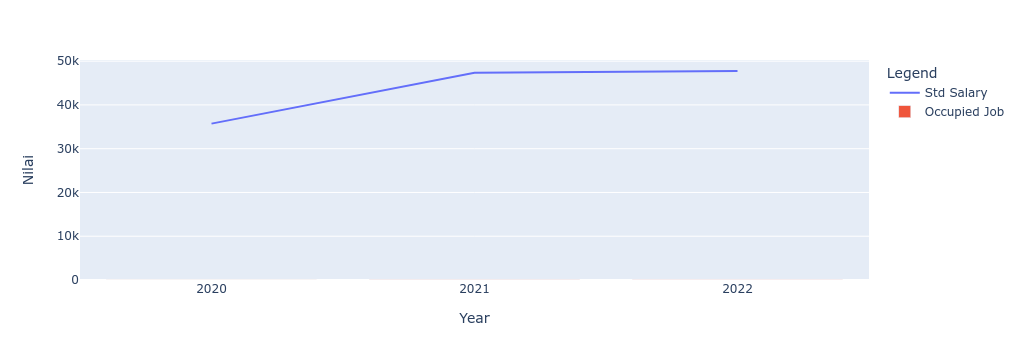

In [72]:
import plotly.express as px

years = list(map(str, x_axis))

fig = px.line(x=years, y=std_salary_jobs, color=px.Constant("Std Salary"),
             labels=dict(x="Year", y="Nilai", color="Legend"))

fig.add_bar(x=years, y=total_occupied_jobs, name="Occupied Job")

fig.show()


# lol 😅, no we need some normalization 

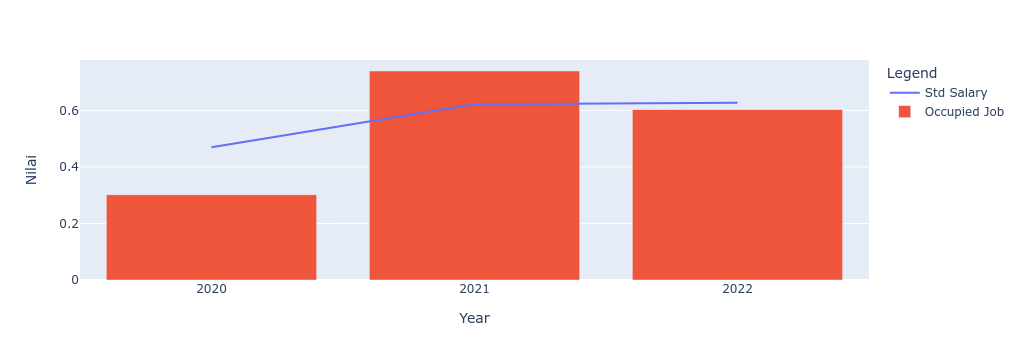

In [84]:
import plotly.express as px

years = list(map(str, x_axis))

fig = px.line(x=years, y=normalized_std_salary_jobs[0], color=px.Constant("Std Salary"),
             labels=dict(x="Year", y="Nilai", color="Legend"))

fig.add_bar(x=years, y=normalized_total_occupied_jobs[0], name="Occupied Job")

fig.show()